In [1]:
#ultimo enviado
#Tesis Maestria CD - Rocío CASTAÑO-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.neighbors import LocalOutlierFactor  
data = pd.read_csv('./Datos/Version2.csv')


x = data.iloc[:,:-1]
y = data.iloc[:,-1].values
data.head(10)

data.shape

(3908, 23)

In [2]:
#ANALISIS EXPLORATORIO DE DATOS
#columnas_seleccionadas = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']]
#print(columnas_seleccionadas.head(10))
#print(data.loc[:9, ['SubRubro', 'Rubro','Clasificacion','Subclasificacion']])
#tabla = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']].head(5)

# Imprimir la 
#print(tabulate(tabla, headers=tabla.columns, tablefmt='psql'))
#print(tabla.head())
pd.set_option('display.max_columns', None)
data.head()


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,RubroCodigo,Rubro,SubclasificacionCodigo,Subclasificacion,ClasificacionCodigo,Clasificacion,UnidadCodigo,Unidad,PrecioVenta,Stock,MovimientosStock,MovimientoCantidad,ImporteCompra
0,357,BATERIAS,1,IVA 21,BATERIAS DE VEHICULOS,1,10478,REPARACION Y MANTENIMIENTO DE RODADOS,28,BATERÍAS AUTOMOTICES,15,BATERÍAS,7,ENERGÍA,1,CABLES Y ENERGÍA,1,UNIDAD,NaN,3,NaN,NaN,"69670,0014"
1,361,MATERIALES,1,IVA 21,MATERIALES PARA EL AREA DE PRODUCCION,1,10422,MATERIALES COMUNICACIÓN,71,ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR,37,ROUTERS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,NaN,NaN,"14504,262"
2,364,ROPA DE TRABAJO,1,IVA 21,NaN,1,10372,ROPA DE TRABAJO,76,EQUIPAMIENTO Y MATERIALES AUDIO,39,EQUIPAMIENTO AUDIO,16,EQUIPAMIENTO TV/RADIO,4,BIENES E INSUMOS MATERIALES,1,UNIDAD,NaN,10,NaN,NaN,"809293,3516"
3,372,COMBUSTIBLES Y LUBRICANTES,1,IVA 21,COMBUSTIBLES Y LUBRINCANTES.,1,10415,COMBUSTIBLES Y LUBRICANTES,159,REPARACIÓN Y MANTENIMIENTO RODADOS,85,REPARACIÓN Y MANTENIMIENTO RODADOS,31,SERVICIOS DE REPARACIÓN Y MANTENIMIENTO,8,SERVICIOS GENERALES,1,UNIDAD,NaN,12,NaN,NaN,"71329,4947"
4,373,MATERIALES ELECTRICOS,1,IVA 21,NaN,0,10420,MATERIALES ELECTRICOS,70,MATERIALES DE CONEXIONES VARIOS,36,ANTENAS Y ACCESORIOS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,0.0,0.0,"41655,0988"


In [9]:
data.shape

(3908, 23)

In [ ]:
#ANALISIS EXPLORATORIO DE DATOS

In [3]:
import nltk
from nltk.corpus import stopwords

# Descarga el recurso si no se ha hecho
nltk.download('stopwords')

# Obtener stopwords en español
stop_words = set(stopwords.words('spanish'))

# Imprimir todas las stopwords
print("Cantidad de stopwords en español:", len(stop_words))
print("Lista de stopwords:")
print(sorted(stop_words))
# -------------------------------------
# 💡 Verifico cuales son las stopwords
# -------------------------------------

Cantidad de stopwords en español: 313
Lista de stopwords:
['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fuer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# --------------------------------------------
# 💻 Eliminar stopwords - Generar N-gramas
# --------------------------------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para limpiar texto, eliminar stopwords y devolver en mayúsculas
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r'\s+', ' ', texto).strip()  # Espacios redundantes
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if p not in stop_words]
    texto_limpio = ' '.join(palabras_filtradas)
    return texto_limpio.upper()  # Convertir a MAYÚSCULAS al final

# Función para generar n-gramas
def generar_ngrams(texto, n):
    palabras = texto.split()
    return [" ".join(ng) for ng in ngrams(palabras, n)]

# Aplicar limpieza
data['Nombre_Limpio'] = data['Nombre'].apply(limpiar_texto)
data['SubRubro_Limpio'] = data['Nombre'].apply(limpiar_texto)
data['Descripcion_Limpia'] = data['Descripcion'].apply(limpiar_texto)

# Generar n-gramas
data['Monogramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 1))
data['Bigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 2))
data['Trigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 3))

# -----------------------------------
# 💡 Verificar si quedaron stopwords
# -----------------------------------
def detectar_stopwords(texto):
    if pd.isna(texto):
        return []
    palabras = texto.lower().split()  # Comparar en minúsculas
    return [p for p in palabras if p in stop_words]

# Aplicar detección
data['Stopwords_residuales'] = data['Nombre_Limpio'].apply(detectar_stopwords)

# Filtrar registros con stopwords aún presentes
con_stopwords = data[data['Stopwords_residuales'].apply(lambda x: len(x) > 0)]

# Imprimir resultado
print(f"\n🟠 Cantidad de registros con stopwords residuales: {len(con_stopwords)}")
print("\n🔍 Ejemplos de stopwords que no se eliminaron correctamente:")
print(con_stopwords[['Nombre', 'Nombre_Limpio', 'Stopwords_residuales']].head(10))

# Mostrar tabla de ejemplo
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head()




🟠 Cantidad de registros con stopwords residuales: 0

🔍 Ejemplos de stopwords que no se eliminaron correctamente:
Empty DataFrame
Columns: [Nombre, Nombre_Limpio, Stopwords_residuales]
Index: []


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA TRABAJO,"[ROPA, TRABAJO]",[ROPA TRABAJO],[]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES LUBRICANTES,"[COMBUSTIBLES, LUBRICANTES]",[COMBUSTIBLES LUBRICANTES],[]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]


In [5]:
# -----------------------------------
#    🔎 Veo resultados
# -----------------------------------
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]
3907,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,PROTECTOR ALTA BAJA TENSION DIGITAL V,"[PROTECTOR, ALTA, BAJA, TENSION, DIGITAL, V]","[PROTECTOR ALTA, ALTA BAJA, BAJA TENSION, TENS...","[PROTECTOR ALTA BAJA, ALTA BAJA TENSION, BAJA ..."


In [6]:
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']]

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA TRABAJO,"[ROPA, TRABAJO]",[ROPA TRABAJO],[]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES LUBRICANTES,"[COMBUSTIBLES, LUBRICANTES]",[COMBUSTIBLES LUBRICANTES],[]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]
...,...,...,...,...,...
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]


In [7]:
# Mostrar resultado
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR PIZARRA MARCADORES,"[BORRADOR, PIZARRA, MARCADORES]","[BORRADOR PIZARRA, PIZARRA MARCADORES]",[BORRADOR PIZARRA MARCADORES]
3907,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,PROTECTOR ALTA BAJA TENSION DIGITAL V,"[PROTECTOR, ALTA, BAJA, TENSION, DIGITAL, V]","[PROTECTOR ALTA, ALTA BAJA, BAJA TENSION, TENS...","[PROTECTOR ALTA BAJA, ALTA BAJA TENSION, BAJA ..."


In [12]:
# Visualizar filas desde la 100 a la 120 (inclusive)
data.loc[100:120, ['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']]
data.loc[1200:1230, ['Nombre', 'Nombre_Limpio']]

,Nombre,Nombre_Limpio
1200,PATCH CORD UTP CAT 5E - 2M ...,PATCH CORD UTP CAT M
1201,PATCH CORD UTP CAT 5E - 3M ...,PATCH CORD UTP CAT M
1202,"SWITCH 24P TEG1024D ""TENDA"" SIN CABLE POWER ...",SWITCH P TEGD TENDA CABLE POWER
1203,"SWITCH 8P S108 ""TENDA"" ...",SWITCH P S TENDA
1204,"GABINETE ESTANCO METALICO 45CM X 45CM X 22,5CM...",GABINETE ESTANCO METALICO CM X CM X CM
1205,"GABINETE ESTANCO METALICA 30CM X 45CM X 22,5CM...",GABINETE ESTANCO METALICA CM X CM X CM
1206,BOTIN TITANIUM 43 ...,BOTIN TITANIUM
1207,CEMENTO X 50 KG ...,CEMENTO X KG
1208,ARENA X MTS ...,ARENA X MTS
1209,PIEDRA X MEDIO MTS,PIEDRA X MEDIO MTS


In [9]:
# Generar n-gramas
data['MonogramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
data['BigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
data['TrigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))

data[['Descripcion', 'Descripcion_Limpia', 'MonogramasD', 'BigramasD', 'TrigramasD']].tail()

,Descripcion,Descripcion_Limpia,MonogramasD,BigramasD,TrigramasD
3903,relojes digitales para Donacion TK 21216/2024,RELOJES DIGITALES DONACION TK,"[RELOJES, DIGITALES, DONACION, TK]","[RELOJES DIGITALES, DIGITALES DONACION, DONACI...","[RELOJES DIGITALES DONACION, DIGITALES DONACIO..."
3904,NaN,,[],[],[]
3905,NaN,,[],[],[]
3906,NaN,,[],[],[]
3907,NaN,,[],[],[]


In [10]:
# -------------------------------------
#  Analisis de frecuencia - metricas
#         Calcular TF-IDF
# -------------------------------------

# Calculo frecuencia de términos
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
#Contar la aparición de palabras clave en el dataset
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Calcular TF-IDF : Calcular la importancia de cada término en el contexto del dataset
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar resultado
#data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head(), 
frecuencia_terminos,
#tfidf_dataframe.head()


(Counter({'BATERIAS': 8,
          'MATERIALES': 11,
          'ROPA': 2,
          'TRABAJO': 4,
          'COMBUSTIBLES': 1,
          'LUBRICANTES': 1,
          'ELECTRICOS': 2,
          'COMUNICACION': 2,
          'COMUNICACIÓN': 1,
          'RESMAS': 1,
          'PAPELERÍA': 1,
          'FERRETERÍA': 1,
          'ART': 2,
          'LIBRERIA': 3,
          'TONER': 45,
          'NODO': 33,
          'TORRES': 2,
          'MET': 3,
          'MANO': 29,
          'OBRA': 6,
          'POSTES': 3,
          'MADERA': 18,
          'COMPUTACION': 1,
          'TOKEN': 1,
          'ROUTERS': 1,
          'C': 48,
          'FUENTE': 58,
          'PESCENOGRAFIA': 1,
          'CANAL': 12,
          'COMPUTADORAS': 4,
          'VENTA': 5,
          'P': 87,
          'ANTENA': 14,
          'PANEL': 34,
          'MIKROTIK': 9,
          'SOPORTE': 37,
          'CIBEREGURIDAD': 1,
          'ELECTRODOMÉSTICOS': 1,
          'PLA': 1,
          'EMPRESA': 1,
          'SILLA

In [15]:
# -------------------------------------
#  Analisis de frecuencia - metricas (filtrado)
#         Calcular TF-IDF
# -------------------------------------

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

#ordenados descendente

# Calcular frecuencia de términos
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        if pd.notna(texto):
            frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Ordenar términos por frecuencia en orden descendente
frecuencia_terminos_ordenados = dict(sorted(frecuencia_terminos.items(), key=lambda item: item[1], reverse=True))

# Filtrar términos poco frecuentes (apariciones menores a 3 veces)
umbral_frecuencia = 3
terminos_frecuentes = {t for t, f in frecuencia_terminos.items() if f >= umbral_frecuencia}

def filtrar_terminos_poco_frecuentes(texto):
    if pd.isna(texto):
        return ""
    palabras = texto.split()
    palabras = [p for p in palabras if p in terminos_frecuentes]
    return ' '.join(palabras)

data['Nombre_Limpio'] = data['Nombre_Limpio'].apply(filtrar_terminos_poco_frecuentes)

# Mostrar términos filtrados ordenados por frecuencia
frecuencia_terminos_ordenados

{'MM': 437,
 'X': 402,
 'CABLE': 213,
 'M': 138,
 'V': 126,
 'FIBRA': 124,
 'MTS': 118,
 'MOD': 115,
 'PATCH': 109,
 'GB': 108,
 'CORD': 98,
 'CAT': 95,
 'DISCO': 91,
 'W': 90,
 'PROYECTO': 90,
 'P': 87,
 'CAJA': 83,
 'G': 80,
 'ANR': 80,
 'LLAVE': 73,
 'PVC': 70,
 'KIT': 67,
 'CM': 65,
 'HP': 60,
 'FUENTE': 58,
 'NOTEBOOK': 58,
 'N': 57,
 'BATERIA': 56,
 'NEGRO': 55,
 'FO': 55,
 'RAEES': 54,
 'LED': 53,
 'USB': 53,
 'PLACA': 53,
 'Nº': 51,
 'PINZA': 49,
 'C': 48,
 'RJ': 48,
 'SFP': 48,
 'AC': 46,
 'TONER': 45,
 'UTP': 45,
 'I': 42,
 'SWITCH': 42,
 'GHZ': 40,
 'XMM': 40,
 'CAÑO': 40,
 'SSD': 39,
 'MEMORIA': 38,
 'CAMARA': 38,
 'SOPORTE': 37,
 'MECHA': 37,
 'GABINETE': 36,
 'PUNTA': 36,
 'TIPO': 36,
 'CONECTOR': 36,
 'RACK': 35,
 'MODULO': 35,
 'RIGIDO': 35,
 'TB': 35,
 'MONITOR': 35,
 'PANEL': 34,
 'NODO': 33,
 'UPS': 33,
 'T': 33,
 'CORE': 33,
 'S': 32,
 'TAPA': 32,
 'LT': 31,
 'TERMINAL': 30,
 'DDR': 30,
 'KM': 30,
 'MANO': 29,
 'PC': 29,
 'U': 29,
 'CINTA': 29,
 'TERMICA': 29,
 'VID

In [16]:
# -------------------------------------
#     LabelEncoder SubRubro
#    Como SubRubro es categórica
# -------------------------------------
#LabelEncoder:Como SubRubro es categórica , debe codificarse como números, usando LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Codificar la variable 'SubRubro'
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])

# Ver las primeras codificaciones como referencia
print(data[['SubRubro', 'SubRubro_encoded']].drop_duplicates())

# Variable objetivo (target) para los modelos
y = data['SubRubro_encoded']



                                               SubRubro  SubRubro_encoded
0                                  BATERÍAS AUTOMOTICES                11
1              ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR               102
2                       EQUIPAMIENTO Y MATERIALES AUDIO                49
3                    REPARACIÓN Y MANTENIMIENTO RODADOS                99
4                       MATERIALES DE CONEXIONES VARIOS                65
...                                                 ...               ...
3801  SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...               106
3822                                 LICENCIAS SOFTWARE                61
3835                                            METALES                70
3838                                           PLASTICO                93
3839                                        COMPONENTES                37

[116 rows x 2 columns]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Verificar que existe y está correcto
print(tfidf_dataframe.head())


    aa  aaa   ab  abierto  abrazadera  abrochadora   ac  acceso  access  \
0  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
1  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
2  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
3  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
4  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   

   aceite  acero  acerogalv  acondicionado  acondicionador  adaptador  \
0     0.0    0.0        0.0            0.0             0.0        0.0   
1     0.0    0.0        0.0            0.0             0.0        0.0   
2     0.0    0.0        0.0            0.0             0.0        0.0   
3     0.0    0.0        0.0            0.0             0.0        0.0   
4     0.0    0.0        0.0            0.0             0.0        0.0   

   adhesivas  adhesivo  adm  adss  aerosol  aflat  agenda  agm  agua  aguja  \
0        0.0       0.0  0.0   0

In [18]:
# Revisión rápida de la densidad
print("Porcentaje de ceros:", (tfidf_dataframe == 0).sum().sum() / tfidf_dataframe.size * 100)

# Revisar si al menos algunas celdas tienen valores positivos
print("Cantidad de valores > 0:", (tfidf_dataframe > 0).sum().sum())

# Mostrar filas específicas donde haya valores distintos de 0
print(tfidf_dataframe[(tfidf_dataframe > 0).any(axis=1)].head())

Porcentaje de ceros: 99.72738859637529
Cantidad de valores > 0: 10643
    aa  aaa   ab  abierto  abrazadera  abrochadora   ac  acceso  access  \
0  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
1  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
2  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
4  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   
5  0.0  0.0  0.0      0.0         0.0          0.0  0.0     0.0     0.0   

   aceite  acero  acerogalv  acondicionado  acondicionador  adaptador  \
0     0.0    0.0        0.0            0.0             0.0        0.0   
1     0.0    0.0        0.0            0.0             0.0        0.0   
2     0.0    0.0        0.0            0.0             0.0        0.0   
4     0.0    0.0        0.0            0.0             0.0        0.0   
5     0.0    0.0        0.0            0.0             0.0        0.0   

   adhesivas  adhesivo  adm  adss  aeros

In [19]:
# 1. Vectorización TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Usamos unigramas y bigramas, y quitamos stopwords en español
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Ajustar y transformar los nombres limpios
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame para visualización o análisis
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape con n-gramas:", tfidf_dataframe.shape)

# 2. Codificación de SubRubro
le = LabelEncoder()
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])




TF-IDF shape con n-gramas: (3908, 4179)


In [20]:
# -------------------------------------
#     # Hasta aca tengo :
# -------------------------------------

tfidf_dataframe #como X (features vectorizadas).

y = SubRubro_encoded #como target.

NameError: name 'SubRubro_encoded' is not defined

In [ ]:
#ahora modelado y analsis comparativo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1260\588240891.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])


Modelo: Naive Bayes
Tiempo de entrenamiento: 0.10 segundos
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.66      0.68      0.67        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.08      0.15        12
           8       0.96      0.58      0.72        38
          11       0.00      0.00      0.00         3
          12       0.67      0.25      0.36         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      0.60      0.75        10
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 7.43 segundos
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.66      0.68      0.67        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      0.33      0.50         3
           7       1.00      0.25      0.40        12
           8       0.93      0.71      0.81        38
          11       0.00      0.00      0.00         3
          12       0.50      0.50      0.50         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.89      0.80      0.84        10
          16       0.50      0.50      0.50         2
          17       0.00      0.00      0.00         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 16.58 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.69      0.71      0.70        34
           4       0.60      0.75      0.67         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.86      0.50      0.63        12
           8       0.77      0.71      0.74        38
          11       0.50      0.67      0.57         3
          12       0.50      0.62      0.56         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.73      0.80      0.76        10
          16       0.00      0.00      0.00         2
          17       0.25      0.50      0.33         2
          19      

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 114.33 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.73      0.65      0.69        34
           4       0.50      0.25      0.33         4
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.89      0.67      0.76        12
           8       0.88      0.61      0.72        38
          11       0.00      0.00      0.00         3
          12       0.60      0.75      0.67         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.78      0.70      0.74        10
          16       0.00      0.00      0.00         2
          17       0.33      0.50      0.40         2
          19     

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 126.38 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.88      0.65      0.75        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       1.00      0.25      0.40        12
           8       0.96      0.61      0.74        38
          11       1.00      0.67      0.80         3
          12       0.56      0.62      0.59         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.86      0.60      0.71        10
          16       0.50      0.50      0.50         2
          17       0.00      0.00      0.00         2
          19     

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 0.03 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.93      0.09        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.91      0.62      0.74        34
           4       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       1.00      0.33      0.50        12
           8       0.86      0.63      0.73        38
          11       0.67      0.67      0.67         3
          12       0.55      0.75      0.63         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      0.60      0.75        10
          16       0.00      0.00      0.00         2
          17       0.50      1.00      0.67         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

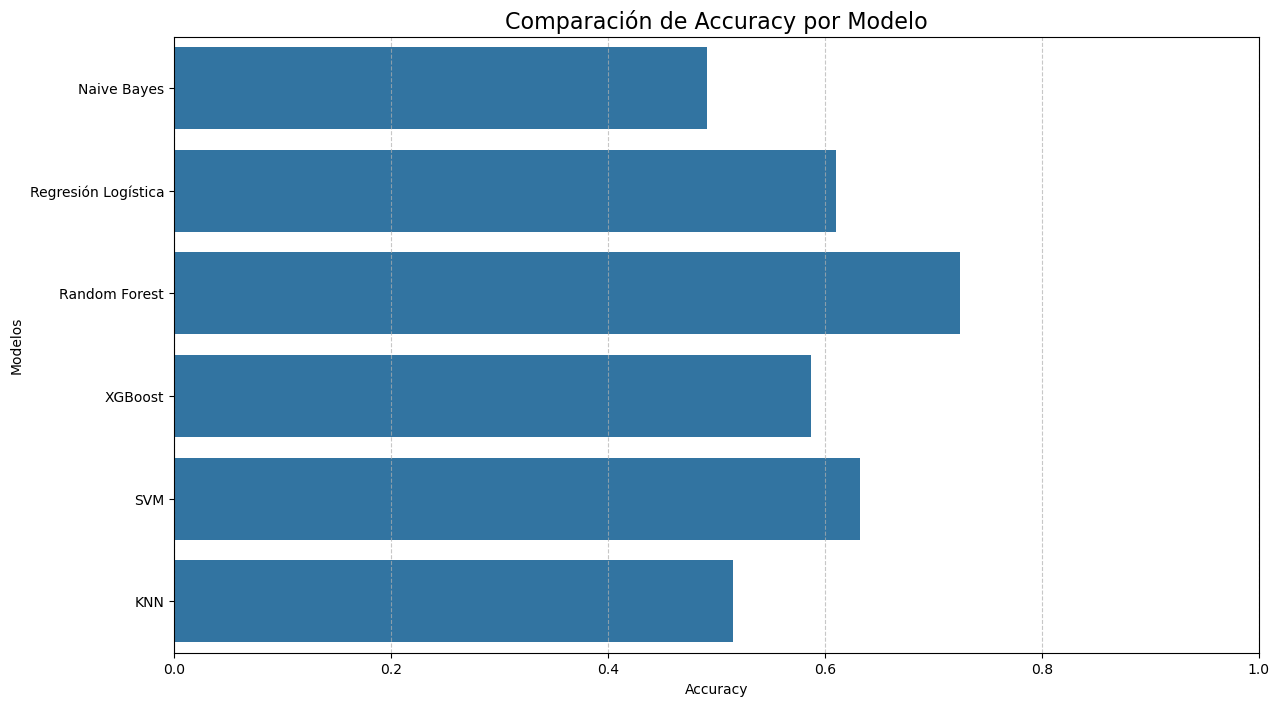

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1260\588240891.py:139: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='F1-Score', y='Modelo', data=resultados_df, ci=None)


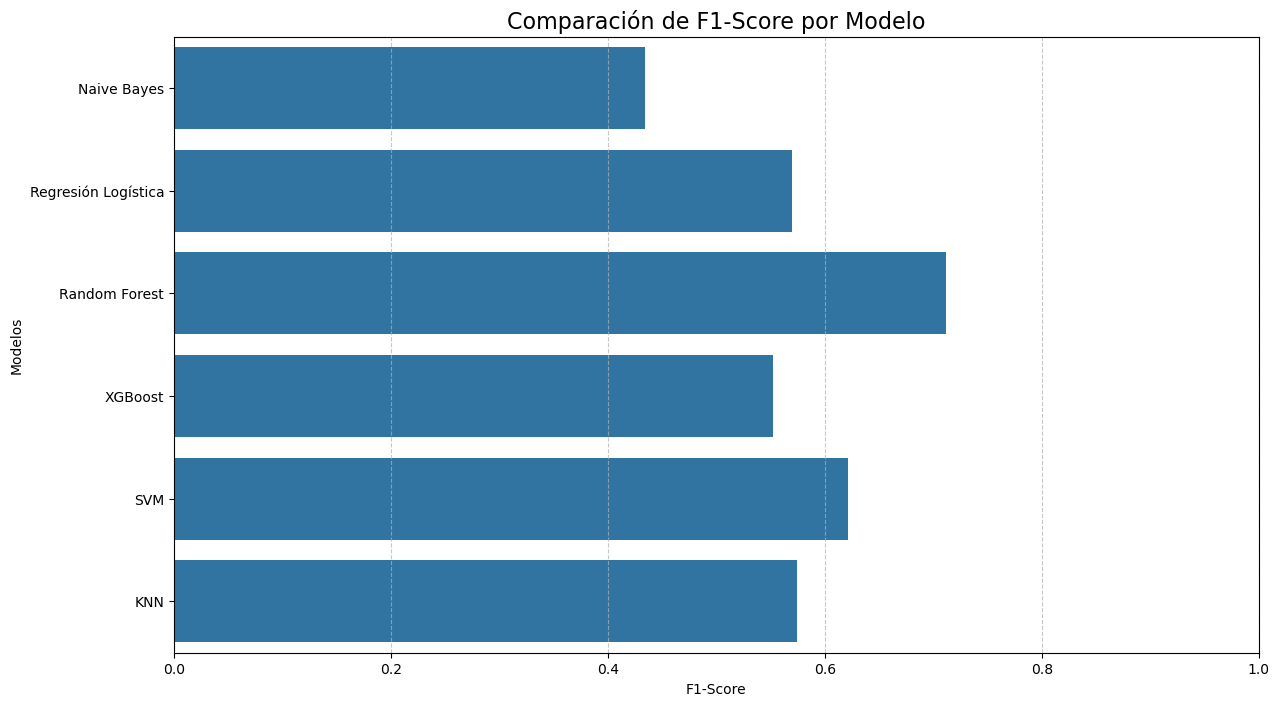

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1260\588240891.py:148: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_df, ci=None)


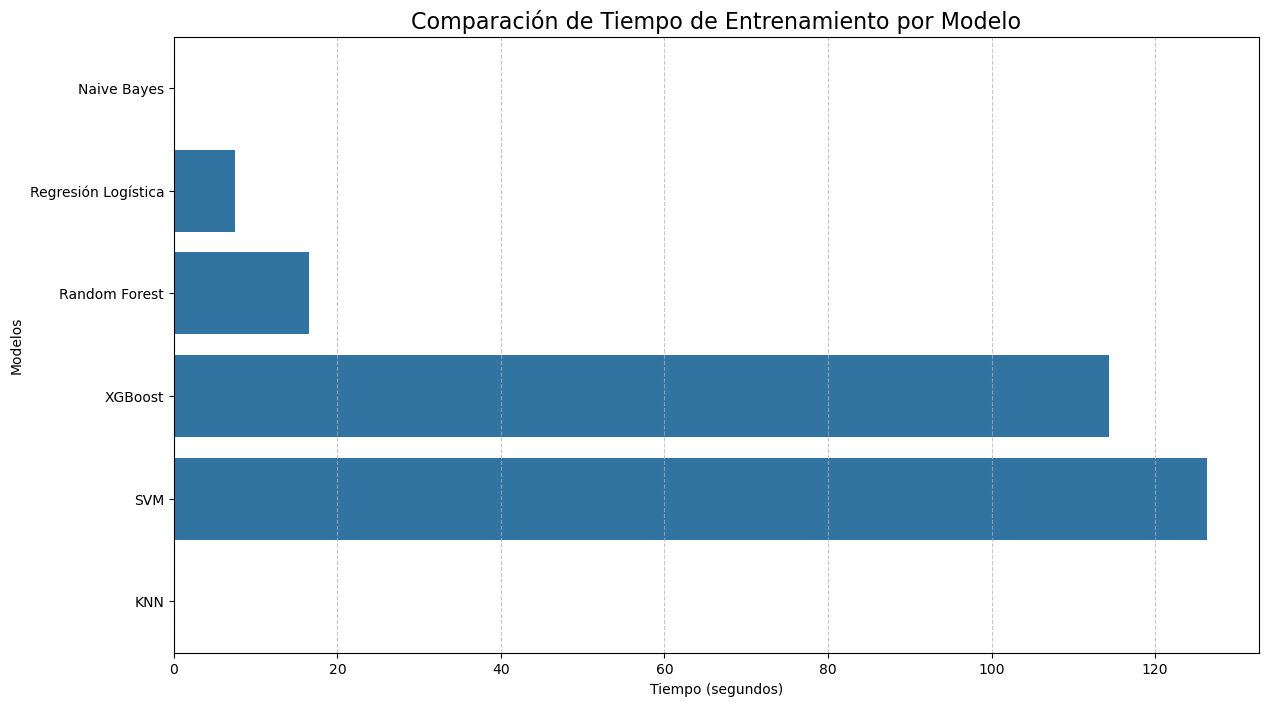

In [27]:
# -------------------------------------
#     Aplicación de modelos
# -------------------------------------
# ⚠️ACLARACIONES:
# Aqui me dio error porque algunas clases Tienes clases en SubRubro_encoded que solo tienen 1 ejemplo.
# Cuando pides stratify=y, Sklearn necesita mínimo 2 muestras por clase para poder dividir entre train y test.
# No se puede dividir 1 solo dato en train/test, por eso explota.
# el dataset tiene algunos subrubros muy raros o casi vacíos (con 1 solo producto).
# Esto complica el modelado porque no se puede entrenar ni testear bien con una clase así.
# entonces debi eliminar el dataset aquellas clases (SubRubro_encoded) que tienen menos de 2 ejemplos
# -------------------------------------
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# Variables
X = tfidf_dataframe
y = data['SubRubro_encoded']

#***********agrego esto porque daba error

# Contar cuántas veces aparece cada clase
conteo_clases = data['SubRubro_encoded'].value_counts()

# Filtrar para quedarnos solo con las clases que tienen al menos 2 productos
clases_validas = conteo_clases[conteo_clases >= 2].index

# Filtrar el dataset
data_filtrado = data[data['SubRubro_encoded'].isin(clases_validas)]

# *** NUEVO: Reasignar etiquetas consecutivas ***
le2 = LabelEncoder()
data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])
# SubRubro_encoded_relabel es una nueva columna con las etiquetas consecutivas correctas.

# Redefinir X e y
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']  # Ahora usamos la versión "relabel"
#**********************************************


# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Cuando pones stratify=y, garantizas que todas las clases estén en la misma proporción tanto en train como en test.
#Así XGBoost no da error.

# Definir todas las clases posibles (importante para XGBoost)
todas_las_clases = np.unique(y)


# . Definir modelos
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y))),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# . Inicializar lista para resultados
resultados = []

# . Entrenar, medir tiempos y almacenar métricas
for nombre, modelo in modelos.items():
    print(f"Modelo: {nombre}")
    
    inicio = time.time()
    modelo.fit(X_train, y_train)
    fin = time.time()

    tiempo_entrenamiento = fin - inicio
    
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-Score': f1,
        'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
    })

    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)

# . Crear DataFrame de resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar tabla final
print("\nTabla resumen de resultados:")
print(resultados_df)

# . Gráfico de barras para comparación

# Configuración de estilo
plt.figure(figsize=(14, 8))
sns.barplot(x='Accuracy', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de Accuracy por Modelo', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='F1-Score', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de F1-Score por Modelo', fontsize=16)
plt.xlabel('F1-Score')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de Tiempo de Entrenamiento por Modelo', fontsize=16)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelos')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()




Modelo con PCA: Logistic Regression
Tiempo de entrenamiento: 0.38 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.59      0.65      0.62        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.71      0.42      0.53        12
           8       0.88      0.39      0.55        38
          11       0.00      0.00      0.00         3
          12       0.44      0.50      0.47         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.67      0.80      0.73        10
          16       0.00      0.00      0.00         2
          17       0.50      0.50    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 8.06 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.61      0.68      0.64        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.75      0.50      0.60        12
           8       0.81      0.66      0.72        38
          11       0.50      0.67      0.57         3
          12       0.45      0.62      0.53         8
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.89      0.80      0.84        10
          16       0.00      0.00      0.00         2
          17       0.33      0.50      0.40         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 12.07 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.73      0.71      0.72        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.55      0.50      0.52        12
           8       0.78      0.66      0.71        38
          11       0.50      0.67      0.57         3
          12       0.50      0.62      0.56         8
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.89      0.80      0.84        10
          16       0.00      0.00      0.00         2
          17       0.33      0.50      0.40         2
          19      

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 2.49 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.67      0.65      0.66        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.86      0.50      0.63        12
           8       0.79      0.39      0.53        38
          11       0.33      0.33      0.33         3
          12       0.36      0.50      0.42         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.75      0.90      0.82        10
          16       1.00      0.50      0.67         2
          17       0.33      0.50      0.40         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\sit

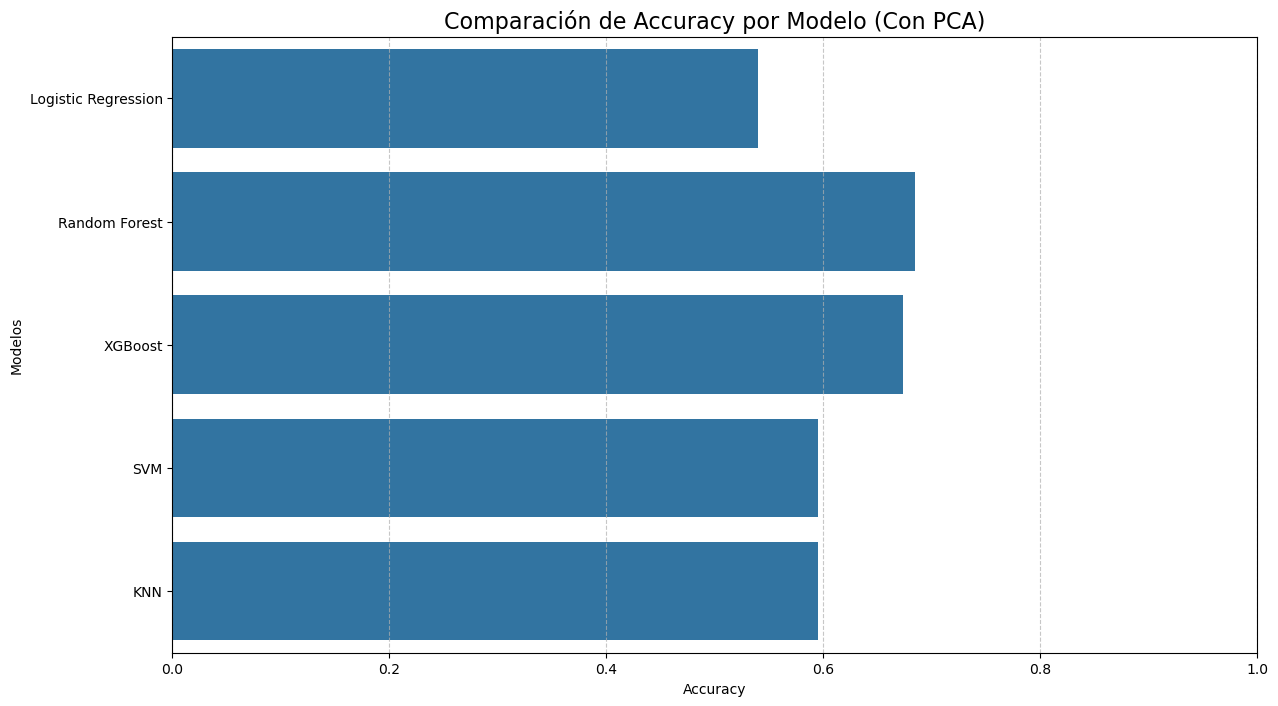

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8456\249955155.py:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='F1-Score', y='Modelo', data=resultados_pca_df, ci=None)


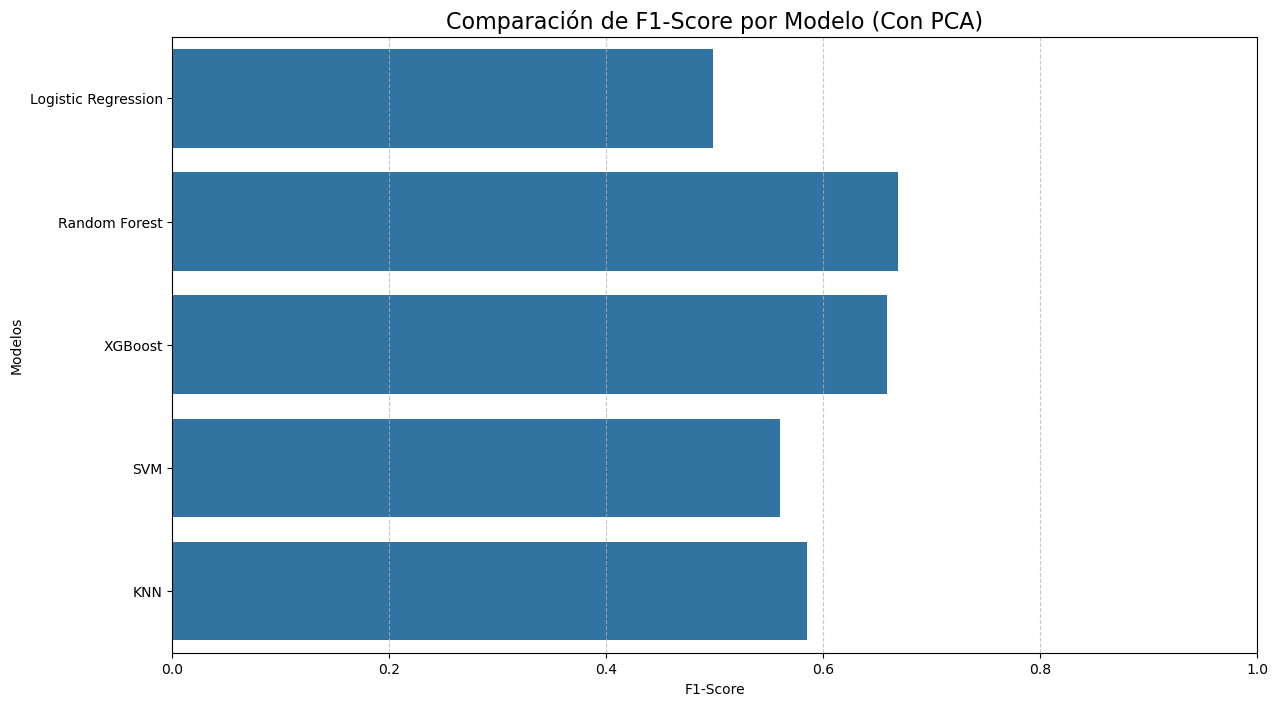

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8456\249955155.py:101: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_pca_df, ci=None)


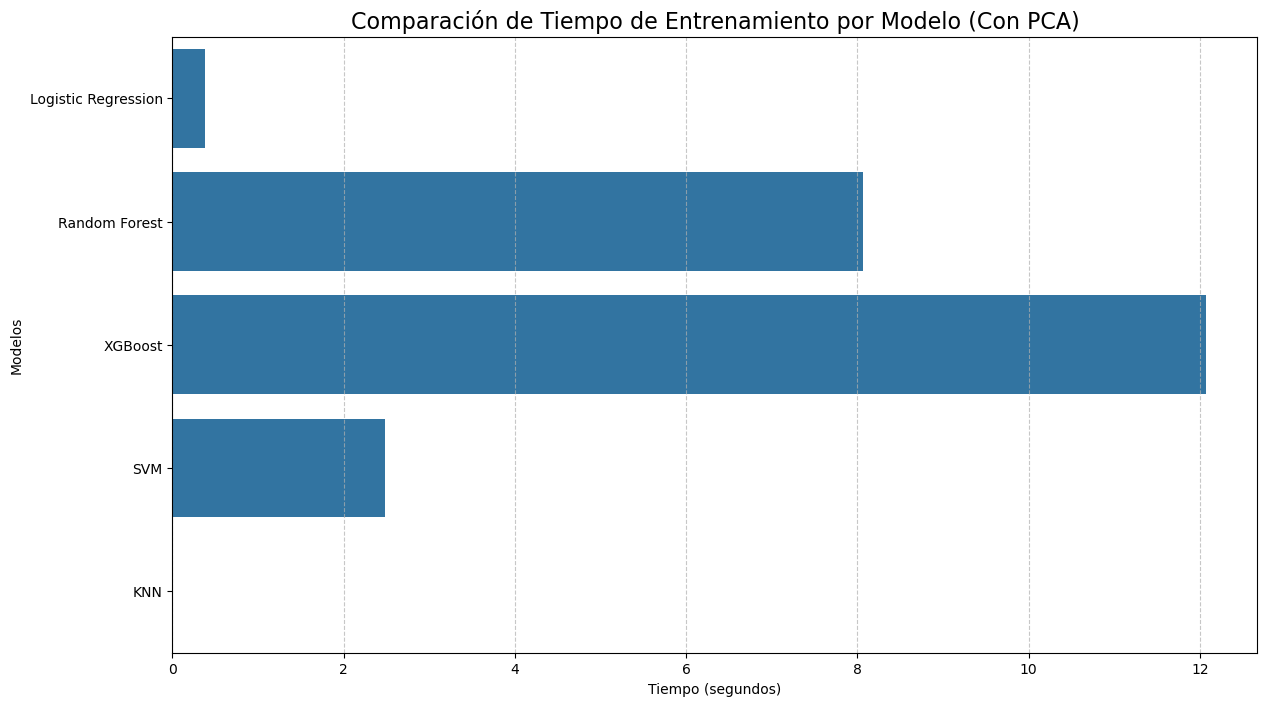

In [21]:
#aplicar PCA y comparar
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# 1. Aplicar PCA para reducir dimensiones
# (Elegimos reducir a 100 componentes, o puedes ajustar este número)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# 2. Separar train/test sobre los datos reducidos
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Definir los mismos modelos
# Definir los modelos para CON PCA (sin MultinomialNB)
#significa que PCA generó valores negativos en X_train_pca,
#y el modelo MultinomialNB no puede trabajar con valores negativos.
modelos_pca = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y))),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 4. Inicializar lista para resultados
resultados_pca = []

# 5. Entrenar, medir tiempos y almacenar métricas (CON PCA)
for nombre, modelo in modelos_pca.items():
    print(f"Modelo con PCA: {nombre}")
    
    inicio = time.time()
    modelo.fit(X_train_pca, y_train_pca)
    fin = time.time()

    tiempo_entrenamiento = fin - inicio
    
    y_pred = modelo.predict(X_test_pca)
    
    acc = accuracy_score(y_test_pca, y_pred)
    f1 = f1_score(y_test_pca, y_pred, average='weighted')

    resultados_pca.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-Score': f1,
        'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
    })

    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
    print("Classification Report:")
    print(classification_report(y_test_pca, y_pred))
    print("-"*60)

# 6. Crear DataFrame de resultados (CON PCA)
resultados_pca_df = pd.DataFrame(resultados_pca)

# Mostrar tabla final
print("\nTabla resumen de resultados (con PCA):")
print(resultados_pca_df)

# 7. Gráficos de comparación CON PCA

plt.figure(figsize=(14, 8))
sns.barplot(x='Accuracy', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de Accuracy por Modelo (Con PCA)', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='F1-Score', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de F1-Score por Modelo (Con PCA)', fontsize=16)
plt.xlabel('F1-Score')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de Tiempo de Entrenamiento por Modelo (Con PCA)', fontsize=16)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelos')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#usionar resultados y graficar comparación
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# 1. Agregar una columna para identificar si es "Sin PCA" o "Con PCA"
resultados_df['Tipo'] = 'Sin PCA'
resultados_pca_df['Tipo'] = 'Con PCA'

# 2. Juntar ambos DataFrames
comparacion_total = pd.concat([resultados_df, resultados_pca_df])

# 3. Mostrar la tabla comparativa final
print("\nTabla Comparativa Final:")
print(comparacion_total)

# 4. Gráfico de comparación Accuracy

plt.figure(figsize=(16,10))
sns.barplot(x='Accuracy', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de Accuracy: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Gráfico de comparación F1-Score

plt.figure(figsize=(16,10))
sns.barplot(x='F1-Score', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de F1-Score: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('F1-Score')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. Gráfico de comparación Tiempo de Entrenamiento

plt.figure(figsize=(16,10))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de Tiempos de Entrenamiento: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelo')
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


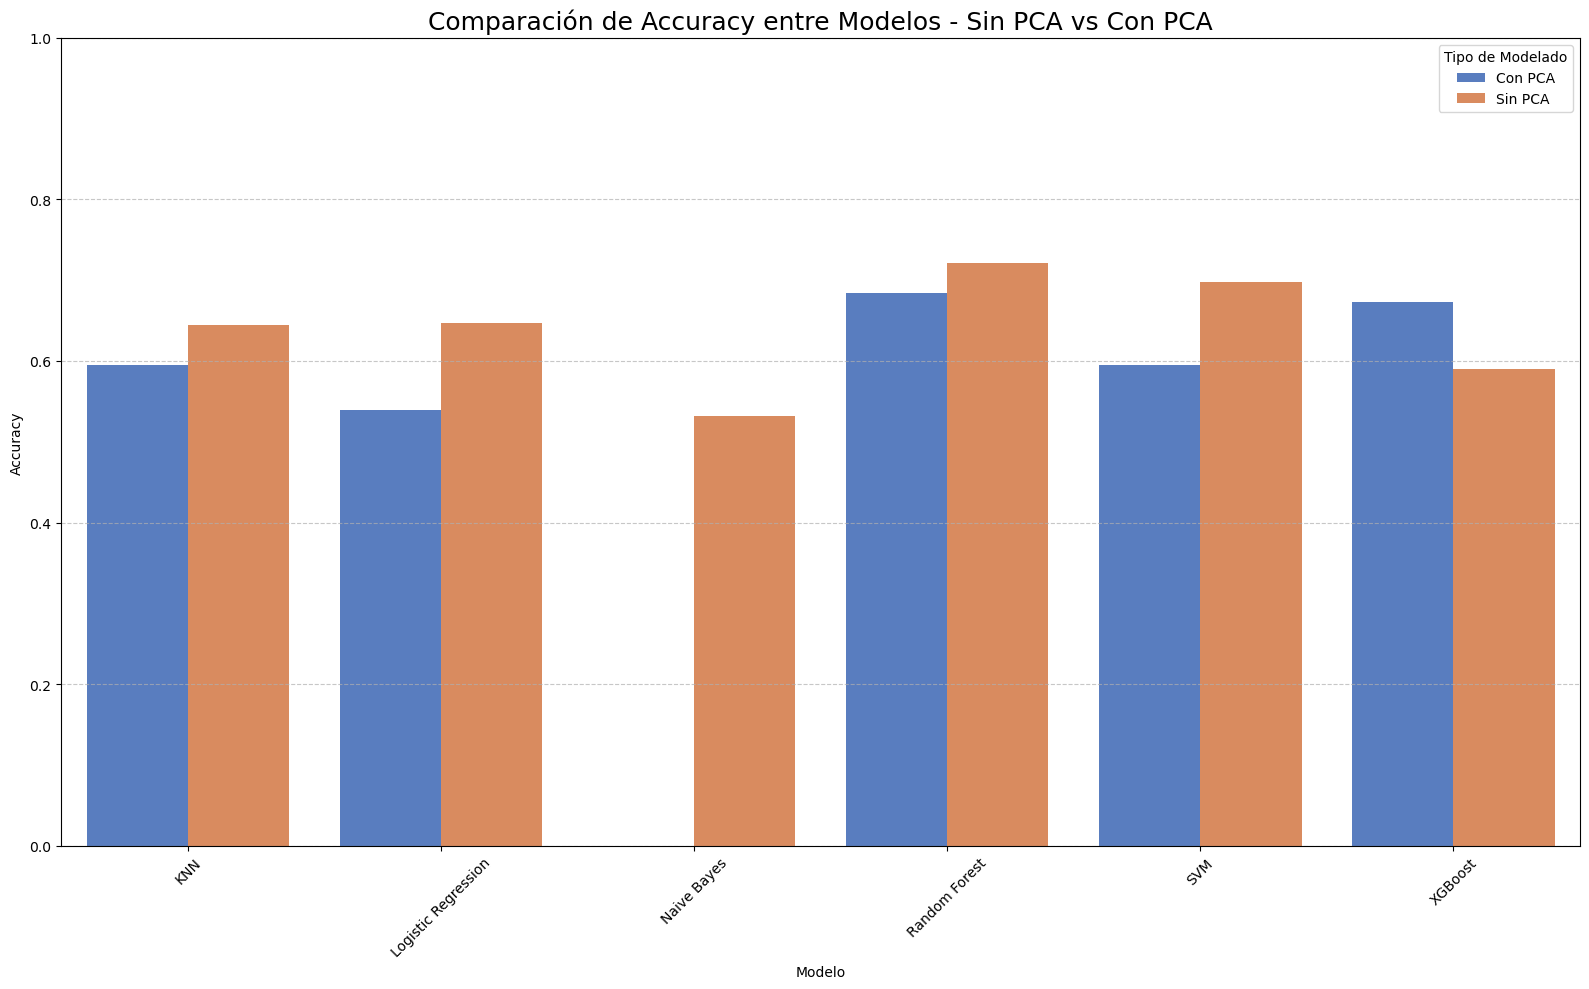

In [23]:
# gráfico combinado (Accuracy Sin PCA vs Con PCA)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Asegurarnos que los modelos estén en el mismo orden
comparacion_total = comparacion_total.sort_values(by=["Modelo", "Tipo"])

# Crear un gráfico combinado para Accuracy
plt.figure(figsize=(16,10))
sns.barplot(
    data=comparacion_total,
    x="Modelo",
    y="Accuracy",
    hue="Tipo",
    palette="muted"
)

plt.title('Comparación de Accuracy entre Modelos - Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Modelado')
plt.tight_layout()
plt.show()


In [ ]:
#aplicacion smote
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
# --- 0. Filtrar clases que tengan al menos 6 ejemplos ---
conteo_clases = data_filtrado['SubRubro_encoded_relabel'].value_counts()
clases_validas = conteo_clases[conteo_clases >= 6].index
data_filtrado = data_filtrado[data_filtrado['SubRubro_encoded_relabel'].isin(clases_validas)]

print(f"Número de clases después del filtrado: {data_filtrado['SubRubro_encoded_relabel'].nunique()} clases")

# --- 1. Vectorizar de nuevo los datos filtrados ---
X_full = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y_full = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Aplicar PCA (100 componentes) ---
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_full)

# --- 3. Definir modelos ---
# --- 3. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
   # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=75),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 4. Inicializar lista de resultados ---
resultados_smote = []

# --- 5. Ejecutar para Sin PCA y Con PCA ---
for tipo, X_data in [('Sin PCA', X_full), ('Con PCA', X_pca)]:
    
    # Separar en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_full, test_size=0.2, random_state=42, stratify=y_full
    )
    
    # Aplicar SMOTE solo en el set de entrenamiento
    sm = SMOTE(k_neighbors=2, random_state=42)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    
    # Entrenar y evaluar cada modelo
    for nombre, modelo in modelos.items():
        
        if tipo == 'Con PCA' and nombre == 'Naive Bayes':
            continue
        
        print(f"Entrenando {nombre} ({tipo})...")
        
        inicio = time.time()
        modelo.fit(X_train_smote, y_train_smote)
        fin = time.time()
        
        tiempo_entrenamiento = fin - inicio
        y_pred = modelo.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        resultados_smote.append({
            'Modelo': nombre,
            'Tipo': tipo,
            'Accuracy': acc,
            'F1-Score': f1,
            'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
        })

# --- 6. Crear DataFrame de resultados ---
resultados_smote_df = pd.DataFrame(resultados_smote)

# --- 7. Mostrar tabla final ---
print("\nTabla Comparativa: Modelos aplicando SMOTE (Sin PCA vs Con PCA)")
print(resultados_smote_df.round(4))



In [ ]:
##nuevos modelos##

In [ ]:
#----------------------------------------
#   💥 VALIDACIÓN
#  Busca de los hipermarametros para Random Forest
#----------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instanciar modelo base
rf = RandomForestClassifier(random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # validación cruzada de 5 folds
                           scoring='f1_weighted',
                           n_jobs=-1,  # paraleliza el proceso
                           verbose=2)

# Ejecutar búsqueda
inicio = time.time()
grid_search.fit(X, y)
fin = time.time()

# Resultados
print("\nMejores hiperparámetros:")
print(grid_search.best_params_)

print(f"\nMejor F1-Score (cv): {grid_search.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")


In [ ]:
# validacion 3 random forest ---es la que funciona
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score

# --- Datos ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# --- Modelo con mejores hiperparámetros ---
rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# --- Validación cruzada ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    inicio = time.time()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    fin = time.time()

    # Matriz de confusión global (todas clases)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)

    # Evitar divisiones por cero
    precision_clase = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP + FP) != 0)
    recall_clase = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    accuracy_clase = np.divide(TP + TN, TP + TN + FP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + TN + FP + FN) != 0)

    # Promedios macro por pliegue
    acc = accuracy_clase.mean()
    prec = precision_clase.mean()
    rec = recall_clase.mean()
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio

    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# --- Mostrar resultados por pliegue ---
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

# --- Promedios ---
promedios = resultados_df.mean().to_frame().T
print("\nPromedios:")
print(promedios.round(4))


In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para SVM
#----------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
import time

# 1. Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# 2. Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],                     # Regularización
    'kernel': ['linear', 'rbf'],          # Tipos de kernel
    'gamma': ['scale', 'auto']            # Solo para kernels no lineales
}

# 3. Definir modelo base
modelo_svm = SVC()

# 4. Definir GridSearchCV con F1-score como métrica
grid = GridSearchCV(estimator=modelo_svm,
                    param_grid=param_grid,
                    scoring=make_scorer(f1_score, average='weighted'),
                    cv=5,
                    n_jobs=-1,
                    verbose=2)

# 5. Ajuste con control de tiempo
inicio = time.time()
grid.fit(X, y)
fin = time.time()

# 6. Resultados
print("\nMejores hiperparámetros:")
print(grid.best_params_)
print(f"\nMejor F1-Score (cv): {grid.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros:
#{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

#Mejor F1-Score (cv): 0.6211
#Tiempo total de búsqueda: 2122.02 segundos


In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Aplicación Cross Validation con mejores hiperparámetros para SVM







In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para Regresión Logística
#----------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

# --- Definir el espacio de búsqueda de hiperparámetros ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            # Fuerza de regularización
    'penalty': ['l2'],                       # Penalización (l1 requiere 'liblinear')
    'solver': ['lbfgs', 'saga'],             # Algoritmos que soportan 'l2' y multiclase
    'multi_class': ['multinomial'],          # Para clasificación multiclase
    'max_iter': [500, 1000]                  # Iteraciones máximas para convergencia
}

# --- Instanciar modelo base ---
modelo_base = LogisticRegression()

# --- Definir el GridSearch ---
grid = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Ejecutar búsqueda ---
inicio = time.time()
grid.fit(X_train, y_train)
fin = time.time()

# --- Mostrar resultados ---
print("Mejores hiperparámetros:")
print(grid.best_params_)
print(f"\nMejor F1-Score (cv): {round(grid.best_score_, 4)}")
print(f"Tiempo total de búsqueda: {round(fin - inicio, 2)} segundos")

# Mejores hiperparámetros:
# {'C': 100, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}

# Mejor F1-Score (cv): 0.6274
# Tiempo total de búsqueda: 53892.58 segundos


In [ ]:
# #----------------------------------------
#   🔎💻⚠️ VALIDACIÓN
#  Cross validacion con  los hipermarametros para Regresión Logistica
# #----------------------------------------
import numpy as np
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo con mejores hiperparámetros
modelo = LogisticRegression(
    C=100,
    max_iter=1000,
    multi_class='multinomial',
    penalty='l2',
    solver='saga'
)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"Pliegue {fold+1}")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio
    
    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(df_resultados.round(4))

print("\nPromedios:")
print(df_resultados.mean().round(4))

# Pliegue 5

# Resultados por pliegue:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.7064     0.5793  0.5241    0.5339   6896.2770
# 1    0.7423     0.6337  0.5985    0.5907   6948.1079
# 2    0.7137     0.5951  0.5395    0.5486   6898.3654
# 3    0.7060     0.5888  0.5347    0.5399   6870.5371
# 4    0.7497     0.6183  0.6093    0.5970   6869.4316

# Promedios:
# Accuracy         0.7236
# Precisión        0.6031
# Recall           0.5612
# F1-Score         0.5620
# Tiempo (s)    6896.5438
# dtype: float64



In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para Naive Bayes
#----------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, f1_score
import time

# --- Datos (usamos los mismos ya preparados) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Modelo base ---
modelo = MultinomialNB()

# --- Definir la grilla de parámetros ---
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 1.0]
}

# --- Configurar GridSearchCV ---
grid_search_nb = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Ejecutar búsqueda ---
inicio = time.time()
grid_search_nb.fit(X, y)
fin = time.time()

# --- Resultados ---
print("Mejores hiperparámetros:")
print(grid_search_nb.best_params_)

print(f"\nMejor F1-Score (cv): {grid_search_nb.best_score_:.4f}")
print(f"Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros:
#{'alpha': 0.1}

#Mejor F1-Score (cv): 0.6143
#Tiempo total de búsqueda: 11.79 segundos


In [ ]:
#    💥💻VALIDACIÓN
#  Aplicación de los hiperparametros encontrados  para Naive Bayes
#   Con Cros Validation
#----------------------------------------------------------
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Paso 1: Vectorización TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X = tfidf_vectorizer.fit_transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# --- Paso 2: Modelo con mejor hiperparámetro ---
modelo = MultinomialNB(alpha=0.1)

# --- Paso 3: Validación cruzada ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    support = cm.sum(axis=1)

    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)

    # Accuracy global
    
    acc = np.trace(cm) / np.sum(cm) 

    # Métricas por clase
    precision_clase = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP + FP) != 0)
    recall_clase = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    f1_clase = np.divide(2 * precision_clase * recall_clase, precision_clase + recall_clase,
                         out=np.zeros_like(precision_clase, dtype=float), where=(precision_clase + recall_clase) != 0)

    # Promedios ponderados
    total = support.sum()
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    # prec = np.sum(precision_clase * support) / total
    # rec = np.sum(recall_clase * support) / total
    f1 = np.sum(f1_clase * support) / total
    tiempo = fin - inicio

    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

    

# --- Mostrar resultados ---
resultados_df = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(resultados_df.round(4))

print("\nPromedios:")
print(resultados_df.mean().to_frame().T.round(4))

# Resultados por pliegue:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.6782     0.5222  0.4289    0.6458      0.1042
# 1    0.7090     0.5199  0.4366    0.6768      0.0794
# 2    0.6881     0.5149  0.4095    0.6619      0.0939
# 3    0.6765     0.5131  0.4291    0.6449      0.0945
# 4    0.7227     0.5451  0.4689    0.6948      0.1098

# Promedios:
#    Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
# 0    0.6949      0.523  0.4346    0.6648      0.0964



In [ ]:
#----------------------------------------
#   🔎 VALIDACIÓN
#  Busca de los hipermarametros para XGBoost - 
#---------------------------------------------
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
#from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Datos: TF-IDF y etiquetas ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Modelo base ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    verbosity=1
)

# --- Grid más reducido (36 combinaciones en lugar de 384 o más) ---
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_lambda': [1],
    'min_child_weight': [1]
}

# --- GridSearchCV con logs visibles ---
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,  # Muestra progreso
    n_jobs=-1   # Usa todos los núcleos disponibles
)

# --- Ajustar modelo ---
grid_search.fit(X, y)

# --- Resultados ---
print("\n✅ Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"📈 Mejor F1-Score (cv): {grid_search.best_score_:.4f}")

#Mejores hiperparámetros encontrados:
#{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'reg_lambda': 1, 'subsample': 0.8}
#📈 Mejor F1-Score (cv): 0.4491


In [ ]:
#----------------------------------------------------------
#    💥💻VALIDACIÓN
#  Aplicación de los hiperparametros encontrados  para XGBoost
# Con Cros Validation
#con las formulas directamente 
#Version nueva corrida-----------------------------------------------------
#----------------------------------------
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
from xgboost import XGBClassifier

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo con mejores hiperparámetros
modelo_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=1,
    n_estimators=50, #baje porque consumia mucho tiemp
    reg_lambda=1,
    subsample=0.8,
    verbosity=0
)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"Pliegue {fold+1}")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    tiempo = fin - inicio
    
    resultados.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })




# Resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados por pliegue:")
print(df_resultados.round(4))

print("\nPromedios:")
print(df_resultados.drop(columns='Pliegue').mean().to_frame().T.round(4))


In [ ]:

#-----------------------------------------
# ⏱️ Busqueda de hiperparametros óptimos para knn
#-----------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

# Definir el modelo base
knn = KNeighborsClassifier()

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Usar F1-Score como métrica de evaluación
scorer = make_scorer(f1_score, average='weighted')

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Tiempo de ejecución
inicio = time.time()
grid_search.fit(X, y)
fin = time.time()

# Mostrar resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"\n📈 Mejor F1-Score (cv): {grid_search.best_score_:.4f}")
print(f"⏱️ Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

#Mejores hiperparámetros encontrados:
#{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

#📈 Mejor F1-Score (cv): 0.5675
#⏱️ Tiempo total de búsqueda: 263.99 segundos



In [ ]:

#----------------------------------------------------------
#    💥💻VALIDACIÓN
#  Aplicación de los hiperparametros encontrados  para KNN
# Con Cros Validation
#con las formulas directamente 
#----------------------------------------
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
import pandas as pd

# Mejor configuración hallada
mejores_params = {
    'n_neighbors': 3,
    'weights': 'distance',
    'metric': 'euclidean'
}

# Inicializar modelo con mejores parámetros
modelo_knn = KNeighborsClassifier(**mejores_params)

# Inicializar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados por pliegue
resultados_knn = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    inicio = time.time()
    modelo_knn.fit(X_train, y_train)
    y_pred = modelo_knn.predict(X_test)
    fin = time.time()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    tiempo = fin - inicio

    resultados_knn.append({
        'Accuracy': acc,
        'Precisión': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Tiempo (s)': tiempo
    })

# Mostrar resultados
df_resultados_knn = pd.DataFrame(resultados_knn)
print(df_resultados_knn.round(4))
promedios = df_resultados_knn.mean().to_frame().T
promedios.index = ['Promedio']
print(promedios.round(4))

#Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
#0    0.5808     0.7656  0.5808    0.6469      0.2812
#1    0.6026     0.7742  0.6026    0.6631      0.2846
#2    0.5892     0.7701  0.5892    0.6533      0.3040
#3    0.6021     0.7786  0.6021    0.6581      0.2986
#4    0.6367     0.8099  0.6367    0.6980      0.2644
 #         Accuracy  Precisión  Recall  F1-Score  Tiempo (s)
#Promedio    0.6023     0.7797  0.6023    0.6639      0.2865


In [ ]:
# fin modelos validacion


Entrenando y evaluando Naive Bayes...


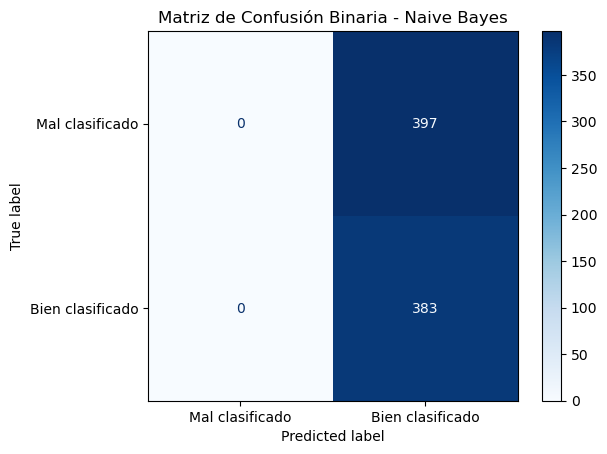


Entrenando y evaluando Regresión Logística...


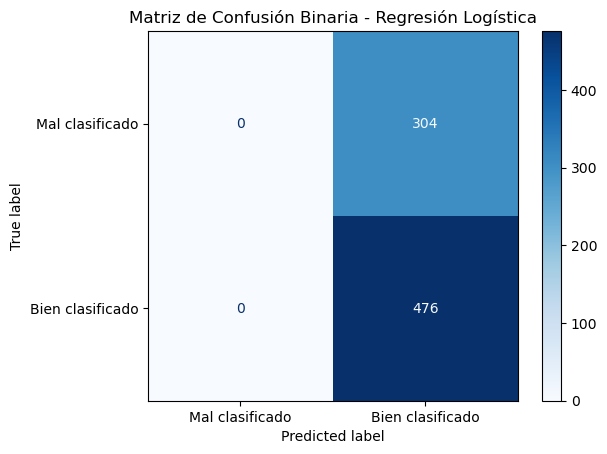


Entrenando y evaluando Random Forest...


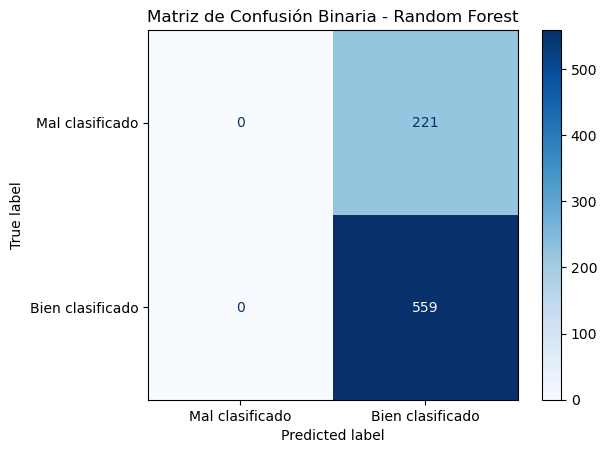


Entrenando y evaluando XGBoost...


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

In [37]:
# --------------------------------------------
# 💻 Matrices de confusión
# --------------------------------------------
#sin smote y sin pca
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# --- 1. Datos de entrada (sin PCA, sin SMOTE) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=len(np.unique(y))  # Ajusta dinámicamente
    ),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 3. Separar en Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Entrenar, predecir y graficar para cada modelo ---
for nombre, modelo in modelos.items():
    print(f"\nEntrenando y evaluando {nombre}...")

    try:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # --- 5. Clasificación binaria: correcto (1) / incorrecto (0) ---
        y_test_binario = (y_test == y_pred).astype(int)
        y_pred_binario = np.ones_like(y_pred)

        # --- 6. Matriz de confusión binaria ---
        cm = confusion_matrix(y_test_binario, y_pred_binario)

        # --- 7. Graficar matriz ---
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mal clasificado", "Bien clasificado"])
        disp.plot(cmap="Blues", values_format='d')
        plt.title(f"Matriz de Confusión Binaria - {nombre}")
        plt.show()

    except Exception as e:
        print(f"Error con modelo {nombre}: {e}")


In [18]:
#Debido a que algunos pliegues de entrenamiento pueden no contener todas las clases originales, 
#fue necesario configurar explícitamente 
#el número de clases en el modelo XGBoost para evitar inconsistencias durante la etapa de entrenamiento
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# --- 1. Datos de entrada (sin PCA) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
     'XGBoost': XGBClassifier(    
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=75
    ),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 3. Separar en Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Aplicar SMOTE solo en el Train ---
sm = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# --- 5. Entrenar, predecir y graficar para cada modelo ---
for nombre, modelo in modelos.items():
    print(f"\nEntrenando y evaluando {nombre}...")

    try:
        modelo.fit(X_train_smote, y_train_smote)
        y_pred = modelo.predict(X_test)

        # --- 6. Crear clasificación binaria: correcto (1) / incorrecto (0) ---
        y_test_binario = (y_test == y_pred).astype(int)  # 1 si predijo bien, 0 si mal
        y_pred_binario = np.ones_like(y_pred)  # modelo "asume" predicción correcta para evaluación

        # --- 7. Matriz de confusión binaria ---
        cm = confusion_matrix(y_test_binario, y_pred_binario)

        # --- 8. Graficar matriz ---
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mal clasificado", "Bien clasificado"])
        disp.plot(cmap="Blues", values_format='d')
        plt.title(f"Matriz de Confusión Binaria - {nombre}")
        plt.show()

    except Exception as e:
        print(f"Error con modelo {nombre}: {e}")



ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [45]:
#----------------------------------------
#   💥 VALIDACIÓN
#    Cross Validation con SVM
#  Ajuste con mejores hiperparámetros encontrados
#----------------------------------------
import numpy as np
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Datos
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# Configurar modelo SVM con los mejores hiperparámetros
modelo_svm = SVC(C=10, kernel='linear', gamma='scale')

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Resultados
accuracies = []
f1_scores = []
tiempos = []

# Validación cruzada
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    inicio = time.time()
    modelo_svm.fit(X_train, y_train)
    y_pred = modelo_svm.predict(X_test)
    fin = time.time()
    
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    tiempos.append(fin - inicio)

# Mostrar resultados
print("--- Resultados SVM (con Cross-Validation) ---")
print(f"Accuracy promedio: {np.mean(accuracies):.4f}")
print(f"F1-Score promedio: {np.mean(f1_scores):.4f}")
print(f"Tiempo promedio de entrenamiento: {np.mean(tiempos):.2f} segundos")


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


--- Resultados SVM (con Cross-Validation) ---
Accuracy promedio: 0.7070
F1-Score promedio: 0.6969
Tiempo promedio de entrenamiento: 31.24 segundos


In [27]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------

from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Usaremos el set vectorizado (sin SMOTE)
X_for_lof = X_full  # TF-IDF

# Crear el modelo LOF
lof = LocalOutlierFactor(
    n_neighbors=20,    # Número de vecinos a considerar (puede probarse 10, 20, 30)
    contamination=0.05 # Estimación inicial: se espera que el 5% sean outliers
)

# Ajustar el modelo y predecir
y_lof_pred = lof.fit_predict(X_for_lof)

# Interpretación:
# -1 = outlier (anómalo)
#  1 = inlier (normal)

# Agregar la predicción al dataset
data_filtrado['LOF_Prediccion'] = y_lof_pred

# Mostrar conteo
print(data_filtrado['LOF_Prediccion'].value_counts())

# Opcional: ver algunos ejemplos de outliers detectados
outliers_detectados = data_filtrado[data_filtrado['LOF_Prediccion'] == -1]
print("\nAlgunos productos detectados como atípicos por LOF:")
print(outliers_detectados[['Nombre', 'Descripcion']].head(10))


LOF_Prediccion
 1    3612
-1     191
Name: count, dtype: int64

Algunos productos detectados como atípicos por LOF:
                                                Nombre  \
29                                        TONER AL 21%   
62   TALADRO MOD HP 2050                           ...   
71   PELA CABLE PROSKIT 8PK-CT001                  ...   
93   NOTEBOOK 02 HP MOD: TPN-I119                  ...   
116  COMPUTADORA INTEL I5 GABINTE SFX MEMORIA 8GB  ...   
229           PATCH PANEL CAT 6A - 24P (cargado)         
231  PATCH PANEL CAT 5E - 24P- RJ45 - "KLINE" "KOMP...   
232  PATCH PANEL CAT 6 - 24P - RJ45 - "KLINE" "KOMP...   
272  FUTP CAT 5E                                   ...   
273  FUTP CAT 5E FURUKAWA                          ...   

                                           Descripcion  
29                                        TONER AL 21%  
62                                                 NaN  
71                                                 NaN  
93               

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\379656913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")


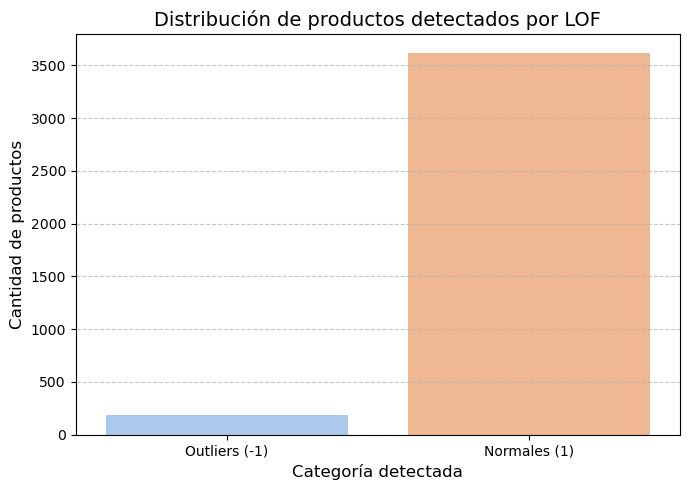

In [28]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que ya ejecutaste esto antes:
# data_filtrado['LOF_Prediccion']  # -1 = outlier, 1 = normal

# Contar la cantidad de normales y outliers
conteo_lof = data_filtrado['LOF_Prediccion'].value_counts().sort_index()
conteo_lof.index = ['Outliers (-1)', 'Normales (1)']  # Etiquetas más claras

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")

# Títulos y etiquetas
plt.title("Distribución de productos detectados por LOF", fontsize=14)
plt.ylabel("Cantidad de productos", fontsize=12)
plt.xlabel("Categoría detectada", fontsize=12)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [29]:
#----------------------------------------
#
#    💥💻DBSCAN
#  
#----------------------------------------
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Usamos el mismo conjunto que para LOF
X_for_dbscan = X_full  # TF-IDF

# Crear modelo DBSCAN
dbscan = DBSCAN(
    eps=1.5,          # Distancia máxima entre dos puntos para ser vecinos (ajustable)
    min_samples=5,    # Mínimo número de puntos en un vecindario para formar un cluster
    metric='cosine'   # Métrica para TF-IDF (coseno funciona mejor que euclidiana)
)

# Ajustar y predecir
dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Interpretación:
# -1 = ruido (outlier)
# 0, 1, 2, ... = clusters encontrados

# Agregar la predicción al DataFrame
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# Mostrar conteo de outliers y clusters
print(data_filtrado['DBSCAN_Cluster'].value_counts().sort_index())

# Opcional: ver algunos ejemplos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


DBSCAN_Cluster
0    3803
Name: count, dtype: int64

Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


Cantidad de clusters encontrados: 1
Cantidad de productos detectados como ruido (outliers): 0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\2299874641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


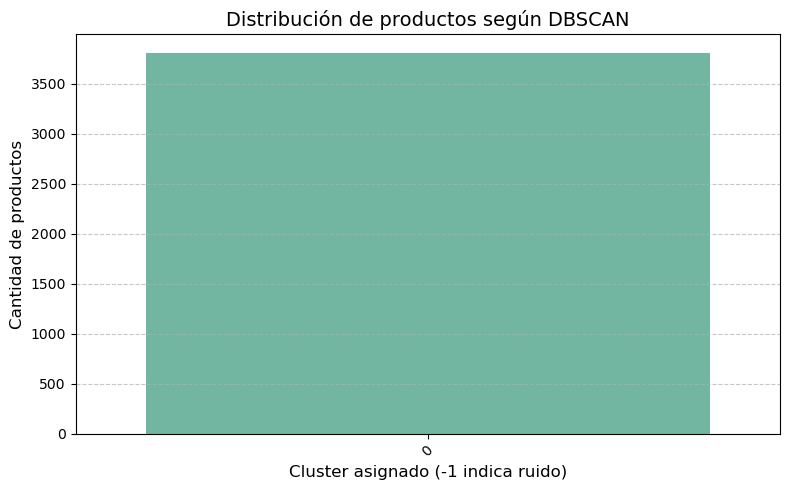


Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


In [30]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=1.5,           # Distancia máxima entre vecinos
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


Cantidad de clusters encontrados: 49
Cantidad de productos detectados como ruido (outliers): 1302


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\741985207.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


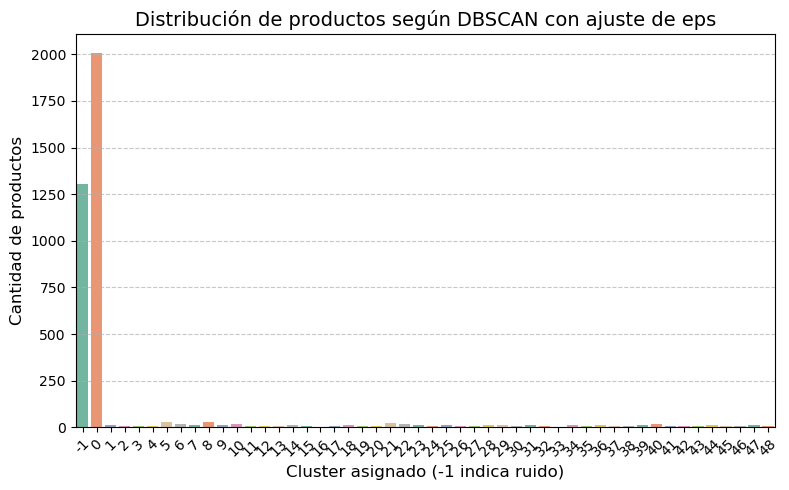


Algunos productos detectados como ruido por DBSCAN:
                                               Nombre  \
3                          COMBUSTIBLES Y LUBRICANTES   
7                                              RESMAS   
8                                           PAPELERÍA   
18                                              TOKEN   
26                     ELECTRODOMÉSTICOS P/LA EMPRESA   
28                                          CAFETERAS   
31                                      TELEVISOR LED   
37                                          REPUESTOS   
43                                       BATERÍAS UPS   
45  MATA CUCARACHAS                               ...   

                               Descripcion  
3             COMBUSTIBLES Y LUBRINCANTES.  
7                             RESMAS AUTOR  
8                          PAPELES- HOJAS.  
18                          TOKEN E CRYPTO  
26  ELECTRODOMÉSTICOS P/ USO DE LA EMPRESA  
28          CAFETERAS P/ USO DE LA EMPRESA  
31  

In [34]:
#Debemos bajar el valor de eps para que DBSCAN sea más estricto.
# eps=0.3,       # Mucho más estricto
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=0.6,       # Mucho más estricto
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN con ajuste de eps', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


In [35]:
# Filtrar productos detectados como outliers en LOF y DBSCAN
outliers_ambos = data_filtrado[
    (data_filtrado['LOF_Prediccion'] == -1) & (data_filtrado['DBSCAN_Cluster'] == -1)
]

# Mostrar algunos ejemplos
print("Productos detectados como atípicos por ambos algoritmos:")
print(outliers_ambos[['Nombre', 'Descripcion']].head(10))

# Mostrar cantidad
print(f"\nCantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: {outliers_ambos.shape[0]}")


Productos detectados como atípicos por ambos algoritmos:
                                                 Nombre Descripcion
71    PELA CABLE PROSKIT 8PK-CT001                  ...         NaN
331   BOBINA UTP CAT 6 (EN MT SUELTO)               ...   CABLE UTP
676                        PELA CABLE PROSKIT 8PK-CT001  PELA CABLE
731   TENAZA CARPINTERO CARPINTERO N8               ...      TENAZA
770   JABALINA AC-COBR 1.5MTS- 3/8" C-TOMAC C-SELLO-...    JABALINA
970   EXTENSION M22 320 MM                          ...         NaN
1109  CART. HP CO. N°93                             ...    C9361TRI
1110  CART. HP NE. N°92                             ...     C9362WL
1139  CARTUCHO HP 662 XL NEGRO                      ...         NaN
1140  CARTUCHO HP 662 XL COLOR                      ...         NaN

Cantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: 71


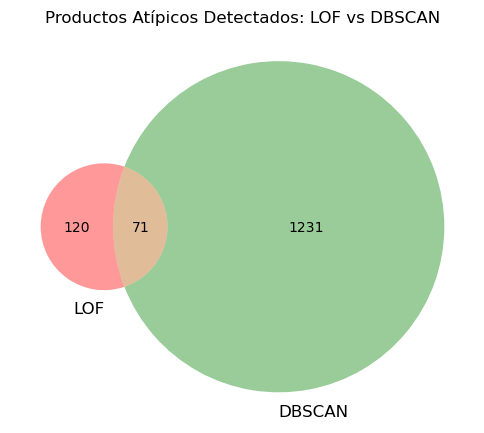

In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#  ya existan del  análisis previo
# data_filtrado['LOF_Prediccion']  # de LOF
# data_filtrado['DBSCAN_Cluster']  # de DBSCAN

# Crear conjuntos de índices
outliers_lof = set(data_filtrado[data_filtrado['LOF_Prediccion'] == -1].index)
outliers_dbscan = set(data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1].index)

# Calcular cantidades
solo_lof = len(outliers_lof - outliers_dbscan)
solo_dbscan = len(outliers_dbscan - outliers_lof)
ambos = len(outliers_lof & outliers_dbscan)

# Dibujar gráfico de Venn
plt.figure(figsize=(6, 6))
venn2(subsets=(solo_lof, solo_dbscan, ambos), set_labels=('LOF', 'DBSCAN'))
plt.title('Productos Atípicos Detectados: LOF vs DBSCAN')
plt.show()
